In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Reading the file

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2> replace 0 with nan values

In [7]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

In [13]:
data[cols] = data[cols].replace(0,np.NaN)

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<h2>Outcome distribution

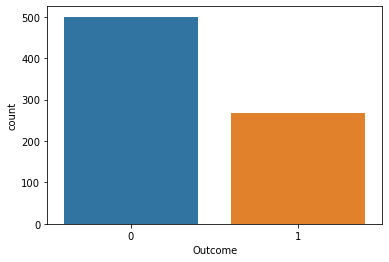

In [16]:
sns.countplot(data['Outcome'])

<h2>Graphs to vizualize how variables are distributed

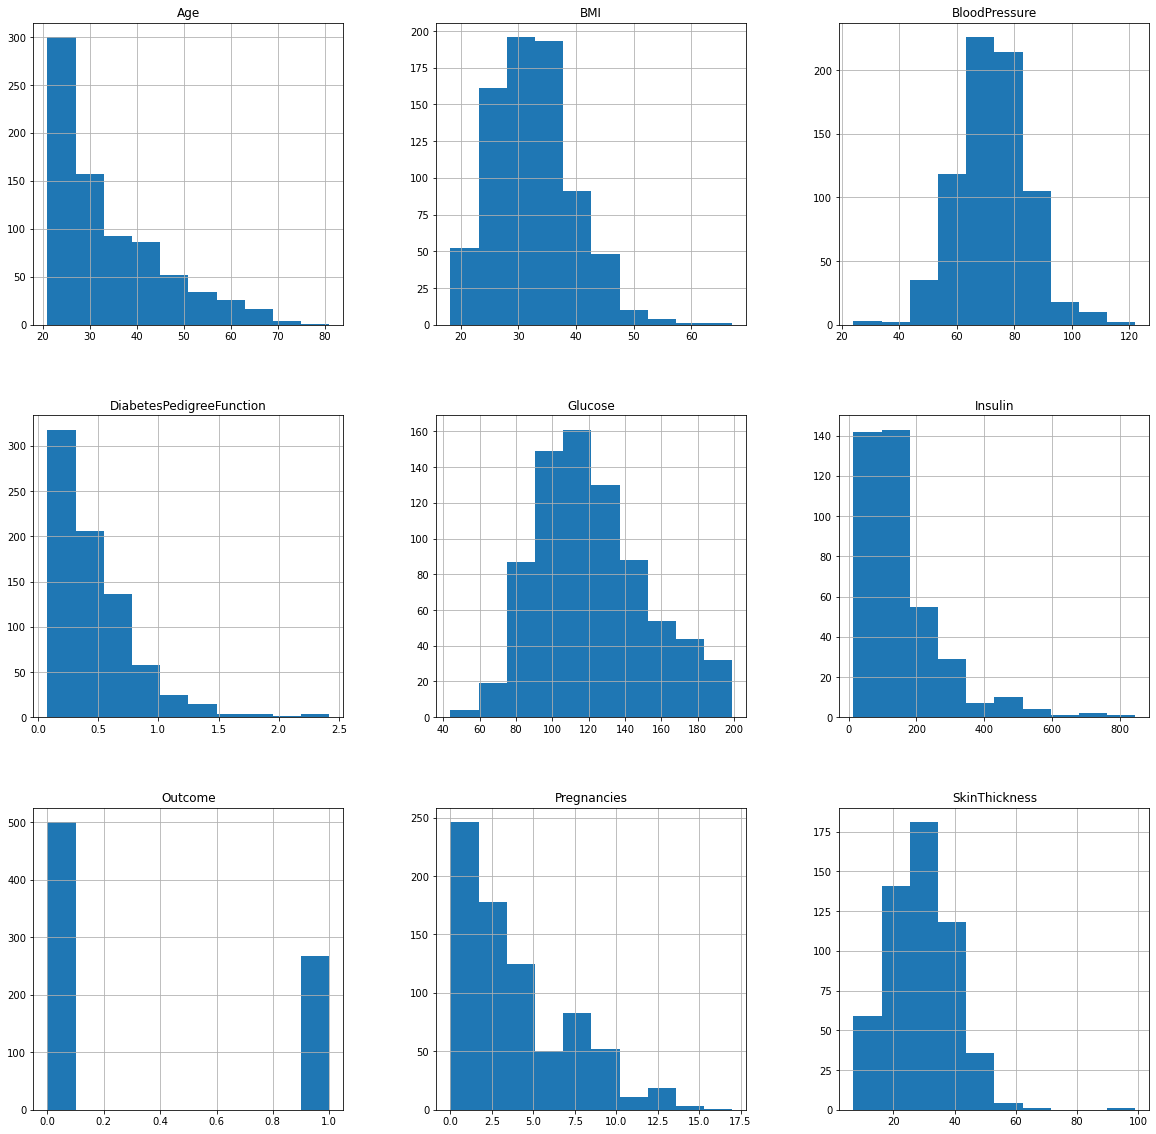

In [23]:
data.hist(figsize=(20,20))
plt.show()

In [18]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<h2>Based on the graphs replace NaN with mean,median or mode

In [24]:
data['Glucose'].fillna(data['Glucose'].mean(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(),inplace=True)
data['Insulin'].fillna(data['Insulin'].median(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)

In [25]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<h2>Correlation between variables

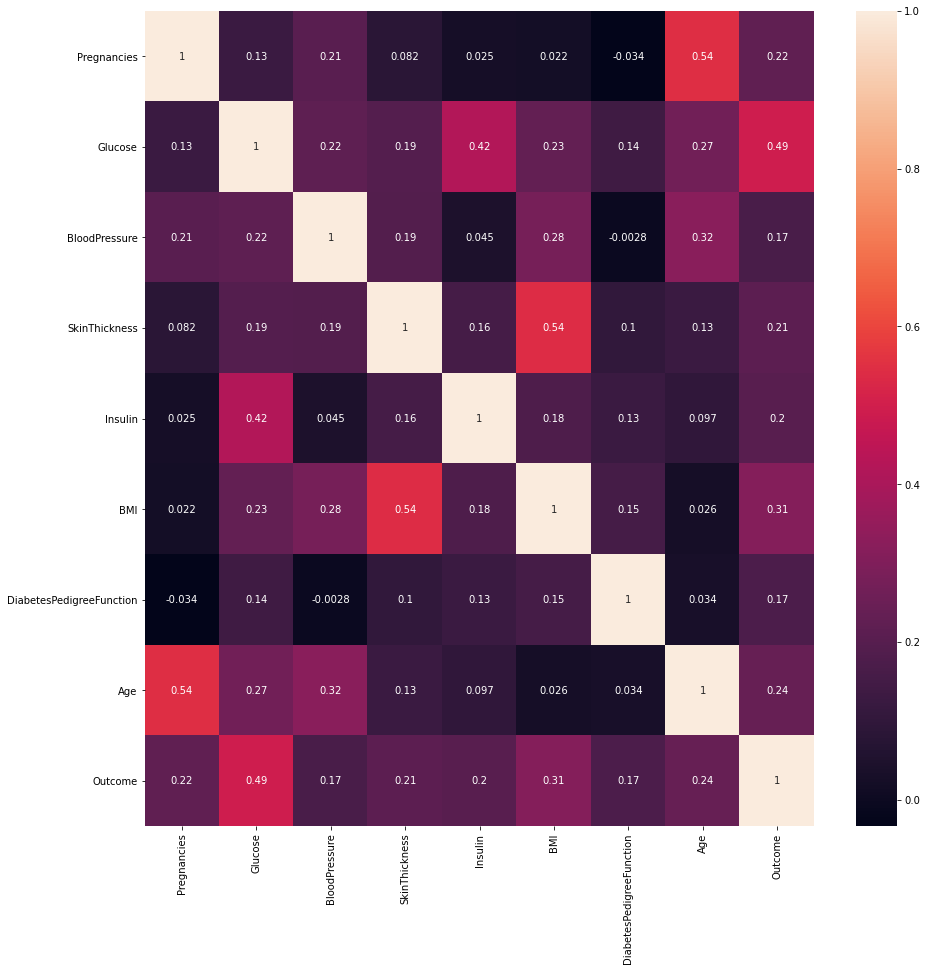

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [30]:
X = data.drop('Outcome',axis=1)

In [31]:
y = data['Outcome'].values

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


<h2>Import and perform StandardScaling

In [85]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [36]:
sc = StandardScaler()
sc.fit(X)
scaled_X = sc.transform(X)


In [38]:
X = pd.DataFrame(data=scaled_X,columns=X.columns)

In [39]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

<h2>for the right value of k iterate over a range of k

In [43]:
train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

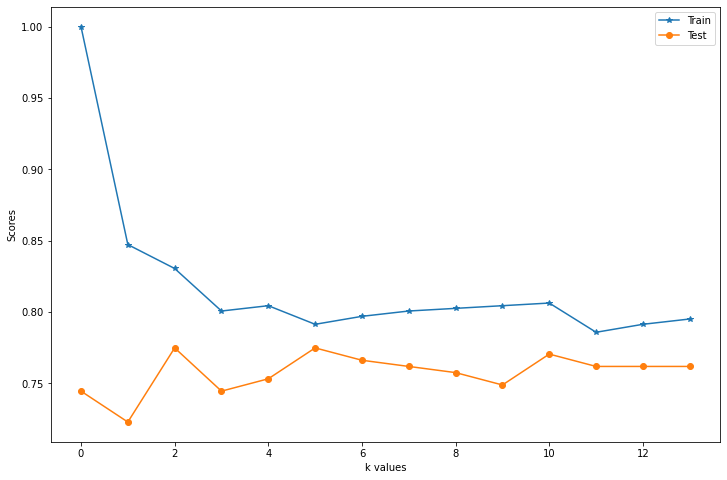

In [67]:
plt.figure(figsize=(12,8))
p = plt.plot(train_scores,label='Train',marker = '*')
p = plt.plot(test_scores,label='Test',marker='o')
plt.xlabel('k values')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [62]:
train_max_score = max(train_scores)

In [63]:
train_score_ind = [i for i ,j in enumerate(train_scores) if j == train_max_score]
k_max = list(map(lambda x : x+1,train_score_ind ))
print('max train score = {} and k = {}'.format(train_max_score,k_max))

max train score = 1.0 and k = [1]


In [64]:
test_max_score = max(test_scores)

In [71]:
test_score_ind = [i for i ,j in enumerate(test_scores) if j == test_max_score]
k_max = list(map(lambda x : x+1,test_score_ind ))
print('max test score = {} and k = {}'.format(test_max_score,k_max))

max test score = 0.7748917748917749 and k = [3, 6]


<h2>Classifier with k value due to which max score was obtained

In [73]:
nn = KNeighborsClassifier(6)

nn.fit(X_train,y_train)
nn.score(X_test,y_test)

0.7748917748917749

In [74]:
preds = nn.predict(X_test)

In [75]:
cm = confusion_matrix(y_test,preds)

In [76]:
cm

array([[137,  11],
       [ 41,  42]], dtype=int64)

In [79]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       148
           1       0.79      0.51      0.62        83

    accuracy                           0.77       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.77      0.76       231



In [96]:
predictions = pd.DataFrame(preds)

In [97]:
predictions.to_csv('diabetespredictions.csv')

<h2>CrossValidation

In [80]:
clf =cross_val_score(nn, X, y, cv = 5, n_jobs = -1)

In [82]:
clf.mean()

0.7370002546473134

<h2>ROC Curve

In [86]:

y_pred_proba = nn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

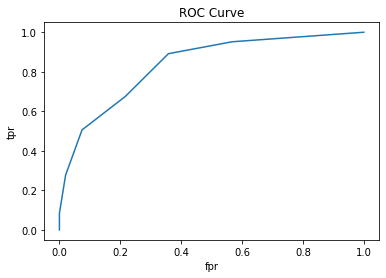

In [89]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

<h2>Hyper Paramter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [91]:
knn_cv.best_score_

0.7721840251252015

In [92]:
knn_cv.best_params_

{'n_neighbors': 25}